In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense

2025-07-23 20:37:24.287446: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-23 20:37:24.307704: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Встановлюємо гіперпараметри:

In [2]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

Завантаження даних:

In [3]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

Передпроцесинг послідовних даних:

In [4]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

Побудова моделі LSTM:

In [5]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання LSTM шару з 32 вузлами
model.add(LSTM(32))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation="sigmoid"))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

Компіляція моделі:

In [6]:
model.build(input_shape=(None, maxlen))

In [7]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 32)             │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 328,353 (1.25 MB)

 Trainable params: 328,353 (1.25 MB)

 Non-trainable params: 0 (0.00 B)

Навчання моделі:

In [9]:
history = model.fit(
    input_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 104ms/step - acc: 0.5647 - loss: 0.6722 - val_acc: 0.8120 - val_loss: 0.4462
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 103ms/step - acc: 0.8156 - loss: 0.4289 - val_acc: 0.8532 - val_loss: 0.3487
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - acc: 0.8633 - loss: 0.3314 - val_acc: 0.7709 - val_loss: 0.5075
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 108ms/step - acc: 0.8716 - loss: 0.3137 - val_acc: 0.8735 - val_loss: 0.3107
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - acc: 0.8917 - loss: 0.2698 - val_acc: 0.8787 - val_loss: 0.3068


Відображення результатів:

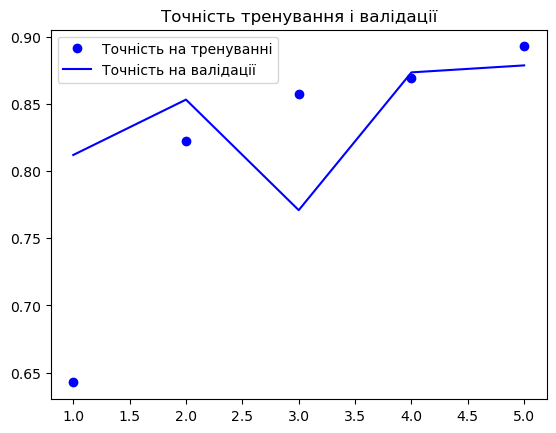

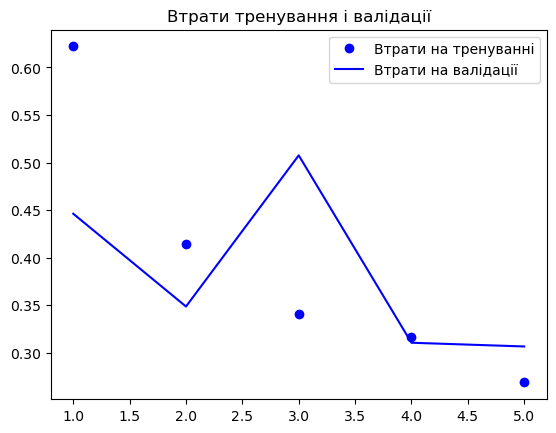

In [10]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(
    epochs, acc, "bo", label="Точність на тренуванні"
)  # Графік точності на тренувальних данних
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)  # Графік точності на валідаційних данних
plt.title("Точність тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(
    epochs, loss, "bo", label="Втрати на тренуванні"
)  # Графік втрат на тренувальних данних
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)  # Графік втрат на валідаційних данних
plt.title("Втрати тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [11]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - acc: 0.8745 - loss: 0.3142
Test Loss: 0.3111886978149414
Test Accuracy: 0.8763200044631958


Практика з BRNN за допомогою Keras:

In [12]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

Встановлюємо гіперпараметри:

In [13]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

Завантаження даних:

In [14]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

Передпроцесинг послідовних даних:

In [15]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

Побудова моделі LSTM:

In [16]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання Bidirectional LSTM шару з 32 вузлами
model.add(Bidirectional(LSTM(32)))
# Параметр: кількість вузлів (розмір прихованого стану)

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation="sigmoid"))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

Компіляція моделі:

In [17]:
model.build(input_shape=(None, maxlen))

In [18]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [19]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 500, 32)        │       320,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 64)             │        16,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 336,705 (1.28 MB)

 Trainable params: 336,705 (1.28 MB)

 Non-trainable params: 0 (0.00 B)

Навчання моделі:

In [20]:
history = model.fit(
    input_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 21s 142ms/step - acc: 0.5267 - loss: 0.6894 - val_acc: 0.7505 - val_loss: 0.5481
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - acc: 0.7644 - loss: 0.5102 - val_acc: 0.8081 - val_loss: 0.4274
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - acc: 0.8452 - loss: 0.3713 - val_acc: 0.8004 - val_loss: 0.4745
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 141ms/step - acc: 0.8743 - loss: 0.3160 - val_acc: 0.8677 - val_loss: 0.3192
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 19s 142ms/step - acc: 0.8814 - loss: 0.2960 - val_acc: 0.8728 - val_loss: 0.3099


Відображення результатів:

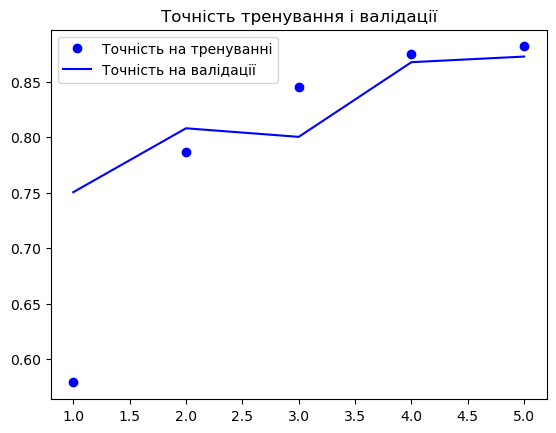

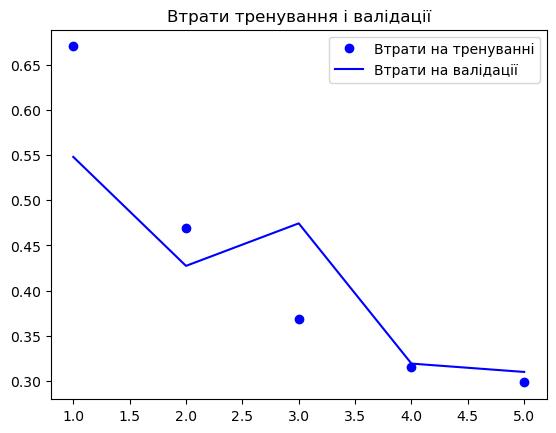

In [21]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(
    epochs, acc, "bo", label="Точність на тренуванні"
)  # Графік точності на тренувальних данних
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)  # Графік точності на валідаційних данних
plt.title("Точність тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(
    epochs, loss, "bo", label="Втрати на тренуванні"
)  # Графік втрат на тренувальних данних
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)  # Графік втрат на валідаційних данних
plt.title("Втрати тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [22]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - acc: 0.8696 - loss: 0.3173
Test Loss: 0.3129473924636841
Test Accuracy: 0.8710799813270569


Практика з Deep BRNN за допомогою Keras:

In [23]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Bidirectional, LSTM, Dense

Встановлюємо гіперпараметри:

In [24]:
max_features = 10000  # кількість слів, що розглядаються як особливості
maxlen = 500  # обмеження кількості слів в тексті
batch_size = 32

Завантаження даних:

In [25]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
# Завантаження тренувальних та тестових даних зі вказанням обмеження на кількість слів

Передпроцесинг послідовних даних:

In [26]:
input_train = pad_sequences(input_train, maxlen=maxlen)
input_test = pad_sequences(input_test, maxlen=maxlen)
# Застосування заздалегідь обраної максимальної довжини до послідовних даних тренувального та тестового наборів

Побудова моделі LSTM:

In [27]:
model = Sequential()
# Створення порожньої моделі Sequential

# Додавання Embedding шару для перетворення слів в вектори фіксованої довжини
model.add(Embedding(max_features, 32))
# Параметри: кількість слів для розгляду як особливості та розмір вектора, що представляє кожне слово

# Додавання декількох Bidirectional LSTM шару з 32 вузлами
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
# Параметр: кількість вузлів (розмір прихованого стану) і return_sequences=True для першого шару, щоб надати послідовність як вхід на наступний шар

# Додавання Dense шару з одним вузлом та активацією sigmoid
model.add(Dense(1, activation="sigmoid"))
# Параметри: кількість вузлів (вихідний розмір) та функція активації (sigmoid для бінарної класифікації)

Компіляція моделі:

In [28]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Навчання моделі:

In [30]:
history = model.fit(
    input_train, y_train, epochs=5, batch_size=128, validation_split=0.3
)
# Запускаємо навчання моделі на тренувальних даних для 5 епох з розміром пакету 128 та розбиттям на тренувальну та валідаційну підмножини

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 42s 292ms/step - acc: 0.5364 - loss: 0.6808 - val_acc: 0.7864 - val_loss: 0.4696
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 289ms/step - acc: 0.7987 - loss: 0.4458 - val_acc: 0.8492 - val_loss: 0.3610
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 288ms/step - acc: 0.8498 - loss: 0.3532 - val_acc: 0.8685 - val_loss: 0.3124
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 39s 287ms/step - acc: 0.8869 - loss: 0.2889 - val_acc: 0.8749 - val_loss: 0.3038
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 289ms/step - acc: 0.9030 - loss: 0.2493 - val_acc: 0.8691 - val_loss: 0.3174


Відображення результатів:

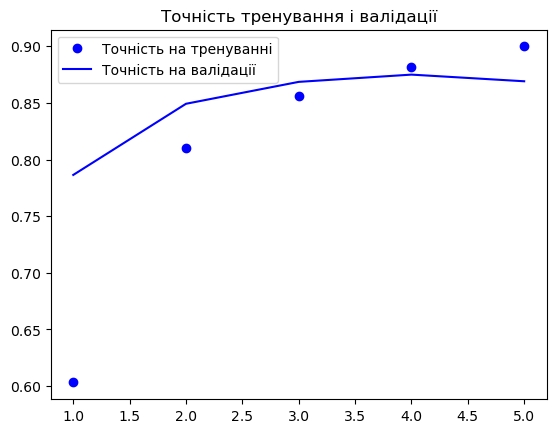

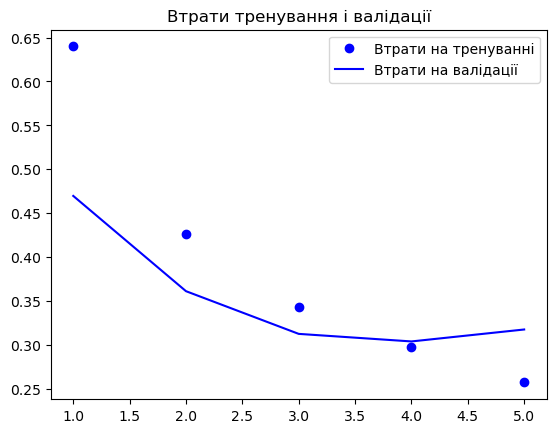

In [31]:
acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(
    epochs, acc, "bo", label="Точність на тренуванні"
)  # Графік точності на тренувальних данних
plt.plot(
    epochs, val_acc, "b", label="Точність на валідації"
)  # Графік точності на валідаційних данних
plt.title("Точність тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.figure()

plt.plot(
    epochs, loss, "bo", label="Втрати на тренуванні"
)  # Графік втрат на тренувальних данних
plt.plot(
    epochs, val_loss, "b", label="Втрати на валідації"
)  # Графік втрат на валідаційних данних
plt.title("Втрати тренування і валідації")  # Заголовок графіку
plt.legend()  # Показати легенду

plt.show()  # Відобразити графіки

Прогнозування з використанням навченої моделі:

In [32]:
predictions = model.predict(input_test)

# Для отримання зрозумілішого вигляду прогнозів, їх можна перетворити в бінарний формат:
binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

# Для порівняння можна вивести деякі прогнозовані значення поряд з фактичними значеннями
for i in range(10):
    print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

# Додатковий крок: Оцінка моделі
# Це дасть загальну точність моделі на тестових даних
test_loss, test_acc = model.evaluate(input_test, y_test)
print("Test Loss: {}".format(test_loss))
print("Test Accuracy: {}".format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - acc: 0.8640 - loss: 0.3227
Test Loss: 0.31503692269325256
Test Accuracy: 0.8668000102043152
